In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
from sklearn.utils import shuffle

def get_data():
    # Load data 
    iris = datasets.load_iris()
    X = iris.data  
    Y = iris.target
    X = (X - X.mean(axis = 0)) / X.std(axis = 0)
    return X, Y

def get_data_2():
    # Load data 
    wine = datasets.load_wine()
    X = wine.data  
    Y = wine.target
    X = (X - X.mean(axis = 0)) / X.std(axis = 0)
    return X, Y


def encode_labels(Y):
    # One hot encoding
    encoder = LabelEncoder()
    encoder.fit(Y)
    encoded_y = encoder.transform(Y)
    return encoded_y

def y2indicator(Y):
    N = len(Y)
    K = len(set(Y))
    T = np.zeros((N, K))
    for i in range(N):
        T[i, int(Y[i])] = 1
    return T

def cost(T, Y):
    # Compute Categorical Cross Entropy Loss
    return -(T * np.log(Y)).sum()

def error_rate(T, Y):
    # Compute the error rate
    return np.mean(T != Y)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def softmax(a):
    exp_a = np.exp(a)
    return exp_a / exp_a.sum(axis =1 , keepdims = True)

def accuracy(T, Y):
    return np.mean(T == Y)

In [0]:
class output_layer(object):
    def initialize_weights(self,n_hidden, n_output):
        np.random.seed(5)
        self.W2 = np.random.randn(n_hidden, n_output)
        self.b2 = np.random.randn(n_output)

    def forward(self, Z):
        # Forward pass: Weight multiplication + activation
        Y = softmax(Z.dot(self.W2) + self.b2)
        return Y 
        

    def backprop(self,Z,Y,T,reg):
        D = Y-T 
        dW2 = Z.T.dot(D) + reg * self.W2  # Regularization term is multiplied to weights
        db2 = D.sum() + reg * self.b2
        return dW2, db2

    def update_weights(self,dW2,db2,learning_rate):
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2  

    def take_weights(self):
        return self.W2

In [0]:
class hidden_layer(object):
    def initialize_weights(self,n_input,n_hidden):
        np.random.seed(5)
        self.W1 = np.random.randn(n_input, n_hidden)
        self.b1 = np.random.randn(n_hidden)

    def forward(self, X):
        # Forward pass: Weight multiplication + activation  
        Z = sigmoid(X.dot(self.W1) + self.b1)
        return Z

    def backprop(self,X,Z,Y,T,reg,W2):
        D = Y-T
        dZ = D.dot(W2.T) * Z * (1 - Z)
        dW1 = X.T.dot(dZ) + reg * self.W1
        db1 = dZ.sum() + reg * self.b1
        return dW1, db1          
    
    def update_weights(self,dW1,db1,learning_rate):
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1



(150, 4)
i: 0  cost:  47.86684409377672  validation error:  0.55
i: 10  cost:  45.76428536220559  validation error:  0.55
i: 20  cost:  43.73351896443566  validation error:  0.55
i: 30  cost:  41.77713235238204  validation error:  0.55
i: 40  cost:  39.898370608934556  validation error:  0.55
i: 50  cost:  38.10082474912489  validation error:  0.6
i: 60  cost:  36.388000095636976  validation error:  0.6
i: 70  cost:  34.76283064383772  validation error:  0.6
i: 80  cost:  33.227240809393905  validation error:  0.65
i: 90  cost:  31.7818553778317  validation error:  0.7
i: 100  cost:  30.425914461027403  validation error:  0.7
i: 110  cost:  29.15738371585624  validation error:  0.7
i: 120  cost:  27.973196536381327  validation error:  0.7
i: 130  cost:  26.869547394338607  validation error:  0.6
i: 140  cost:  25.84217105697243  validation error:  0.6
i: 150  cost:  24.886572066221945  validation error:  0.6
i: 160  cost:  23.99819510176647  validation error:  0.6
i: 170  cost:  23.172

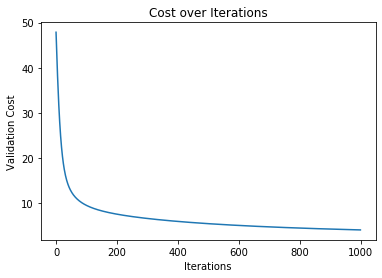

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

class NN(object):
    def __init__(self, n_input, n_hidden, n_output):
        self.n_input = n_input
        self.n_hidden = n_hidden
        self.n_output = n_output

    def fit(self, X, Y, learning_rate = 10e-6, reg = 10e-7, epochs = 10000, show_figure = False):
        X, Y = shuffle(X, Y)
        x_valid = X[-40:-20]  # Split some data for the validation set
        y_valid = Y[-40:-20]
        t_valid = y2indicator(y_valid)

        x_test = X[-20:]
        y_test = Y[-20:]
        t_test = y2indicator(y_test)

        x_train = X[:-40]
        y_train = Y[:-40]
        T = y2indicator(y_train) # target values

        hidden_layer1 = hidden_layer()
        output_layer1 = output_layer()

        # Weight initialization
        hidden_layer1.initialize_weights(self.n_input,self.n_hidden)
        output_layer1.initialize_weights(self.n_hidden,self.n_output)

        costs = []

        for i in range(epochs):
            
            Z = hidden_layer1.forward(x_train)
            Y = output_layer1.forward(Z)

            W2 = output_layer1.take_weights()
            dW1, db1 = hidden_layer1.backprop(x_train,Z,Y,T,reg,W2)
            dW2, db2 = output_layer1.backprop(Z,Y,T,reg)

            hidden_layer1.update_weights(dW1,db1,learning_rate)
            output_layer1.update_weights(dW2,db2,learning_rate)

            # Print cost every 10 iterations
            if i % 10 == 0: 
                Z = hidden_layer1.forward(x_valid)
                predY_valid = output_layer1.forward(Z)
                c = cost(t_valid, predY_valid)   
                costs.append(c)
                e = error_rate(y_valid, np.argmax(predY_valid, axis = 1))
                print("i:", i, " cost: ", c, " validation error: ", e)

            if i == epochs-1:
                Z = hidden_layer1.forward(x_test)
                predY_test = output_layer1.forward(Z)
                c = cost(t_test, predY_test)   
                e = error_rate(y_test, np.argmax(predY_test, axis = 1))
                print("Test cost: ", c, " test error: ", e)

        if show_figure:
            plt.plot(costs)
            plt.title('Cost over Iterations')
            plt.xlabel('Iterations')
            plt.ylabel('Validation Cost')
            plt.show()


def main():
    X, Y = get_data()
    print(X.shape)
    Y = encode_labels(Y)
    n_input = X.shape[1]
    n_hidden = 100
    n_output = len(set(Y))
    model = NN(n_input, n_hidden, n_output)
    model.fit(X, Y, learning_rate = 10e-6, reg = 10e-7, epochs = 10000, show_figure=True)

main()

(178, 13)
i: 0  cost:  81.81167930190992  validation error:  0.5
i: 10  cost:  79.78786386010042  validation error:  0.5
i: 20  cost:  77.82864483912608  validation error:  0.5
i: 30  cost:  75.93474975121337  validation error:  0.5
i: 40  cost:  74.10638962188227  validation error:  0.5
i: 50  cost:  72.34313289674547  validation error:  0.45
i: 60  cost:  70.64384910727674  validation error:  0.45
i: 70  cost:  69.0067255756432  validation error:  0.45
i: 80  cost:  67.42934487385398  validation error:  0.45
i: 90  cost:  65.90880259751086  validation error:  0.45
i: 100  cost:  64.44184409907723  validation error:  0.45
i: 110  cost:  63.02500247540088  validation error:  0.45
i: 120  cost:  61.6547254209137  validation error:  0.45
i: 130  cost:  60.3274836612154  validation error:  0.4
i: 140  cost:  59.039857777671024  validation error:  0.4
i: 150  cost:  57.78860318371753  validation error:  0.4
i: 160  cost:  56.57069494467406  validation error:  0.4
i: 170  cost:  55.38335523

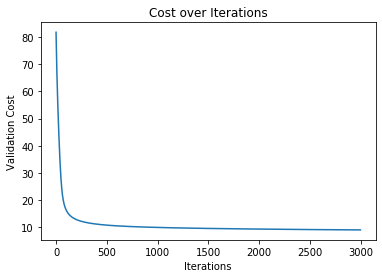

In [8]:
def main2():
    X, Y = get_data_2()
    print(X.shape)
    Y = encode_labels(Y)
    n_input = X.shape[1]
    n_hidden = 100
    n_output = len(set(Y))
    model = NN(n_input, n_hidden, n_output)
    model.fit(X, Y, learning_rate = 10e-6, reg = 10e-7, epochs = 20000, show_figure=True)

main2()